### General Imports

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3

### Collecting interpolated and averaged files

In [3]:
allFiles = glob.glob("./interpolatedData/*.csv")
print(allFiles)

['./interpolatedData\\S-01.csv', './interpolatedData\\S-02.csv', './interpolatedData\\S-03.csv', './interpolatedData\\S-04.csv', './interpolatedData\\S-05.csv', './interpolatedData\\S-06.csv', './interpolatedData\\S-07.csv', './interpolatedData\\S-08.csv', './interpolatedData\\S-09.csv', './interpolatedData\\S-11.csv', './interpolatedData\\S-12.csv', './interpolatedData\\S-13.csv', './interpolatedData\\S-14.csv', './interpolatedData\\S-15.csv', './interpolatedData\\S-BU1.csv', './interpolatedData\\S-BU2.csv']


In [4]:
avgData = glob.glob("./stretchedAvgData/*.csv")
print(avgData)

['./stretchedAvgData\\OR16 Blocked 1.csv', './stretchedAvgData\\OR16 Blocked 2.csv', './stretchedAvgData\\OR16 Unblocked.csv', './stretchedAvgData\\OR7 Blocked.csv', './stretchedAvgData\\OR7 Unblocked.csv']


### A little bit more data cleaning

In [5]:
df = {}
for x in allFiles:
    name = x.split('\\')[1].split('.')[0]
    df[name] = pd.read_csv(x,parse_dates=[0])

In [6]:
mergedData = pd.read_csv('./mergedData/mergedFrame.csv',parse_dates=[0])

In [7]:
stAvgDf = {}
for x in avgData:
    name = x.split('\\')[1].split('.')[0]
    stAvgDf[name] = pd.read_csv(x,parse_dates=[0])

In [16]:
mergedData

,Date_Time,S-01,S-03,S-04,S-05,S-06,S-07,S-08,S-09,S-11,S-12,S-13,S-14,S-15,S-BU1,S-BU2,Average,Variance
0,2020-12-22 12:59:00,9,0,9,27,0,9,0,0,0,21,9,0,9,0,0,6.200000,62.400000
1,2020-12-22 12:59:10,4,0,0,27,4,9,0,9,0,9,9,0,0,0,3,4.933333,45.558333
2,2020-12-22 12:59:20,9,0,0,18,9,9,0,9,0,9,48,0,0,0,6,7.800000,134.775000
3,2020-12-22 12:59:30,9,18,9,9,0,9,0,0,0,21,27,0,0,0,9,7.400000,67.350000
4,2020-12-22 12:59:40,9,18,27,18,0,9,0,0,0,30,27,0,0,4,6,9.866667,109.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,2020-12-22 16:08:00,0,0,0,0,9,0,0,9,0,0,1023,0,0,4,177,81.466667,61155.233333
1135,2020-12-22 16:08:10,0,0,0,18,0,0,0,21,0,0,1319,9,0,0,192,103.933333,100964.933333
1136,2020-12-22 16:08:20,4,0,0,18,0,9,0,0,0,33,1615,0,9,0,187,125.000000,150650.625000
1137,2020-12-22 16:08:30,30,0,0,0,0,9,0,0,0,33,1911,0,9,0,182,144.933333,210756.933333


### Plotting average and variance

Text(0.5, 1.0, 'Variance in Particles')

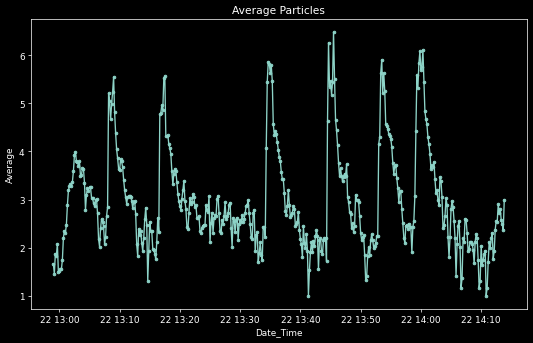

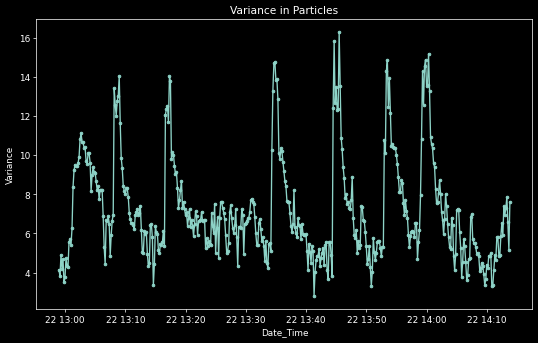

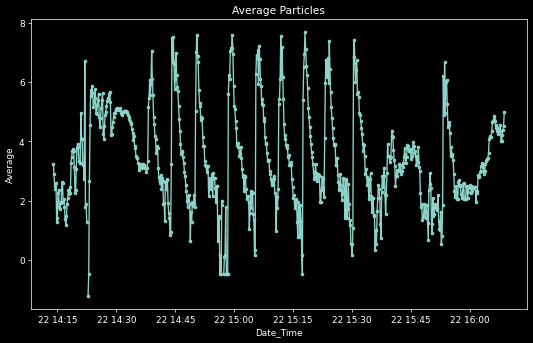

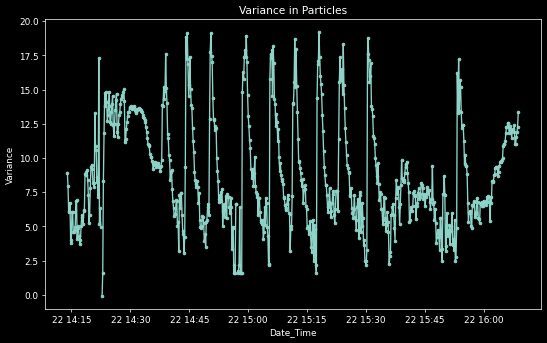

In [9]:
split = 450

fig = plt.figure(0, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Average'][:split])/np.log(3),'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(2, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Variance'])[:split],'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

fig = plt.figure(1, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Average'][split:])/np.log(3),'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(4, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Variance'])[split:],'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

### Looking at each expirements data

In [10]:
indexList = {}
thresh = 4
for notUse,x in enumerate(stAvgDf):
    switch = 1
    for idx,i in enumerate(np.log(stAvgDf[x]['Average'])/np.log(3)):
        if i <= thresh:
            if not switch:
                indexList[x] = idx-120
                switch = 1
                # print(stAvgDf[x]['Average'][idx])
        else:
            switch = 0
    print(indexList[x],'seconds',x)

89 seconds OR16 Blocked 1
83 seconds OR16 Blocked 2
70 seconds OR16 Unblocked
73 seconds OR7 Blocked
50 seconds OR7 Unblocked


Text(0.5, 1.0, 'Average Particles vs. Time')

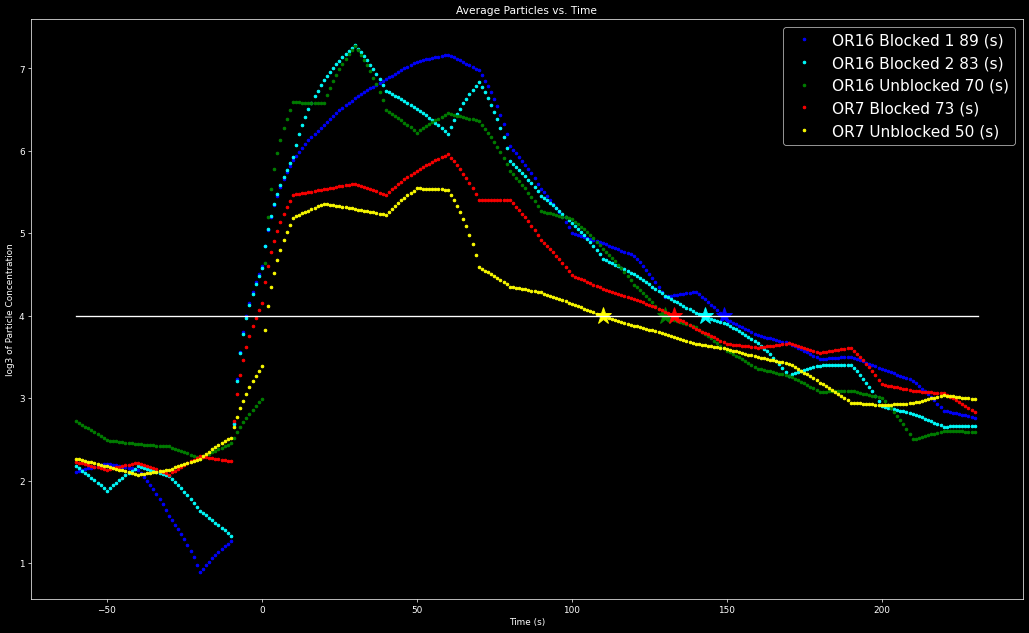

In [11]:
color = ['blue','cyan','green','red','yellow']
for idx,x in enumerate(stAvgDf):
    fig = plt.figure(0, figsize=(20,12), dpi=64)
    ax = fig.gca()
    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    ax.plot([i for i in range(-60,len(yData)-60)],np.log(yData)/np.log(3),'.',color = color[idx],label = x + ' ' + str(xData) + ' (s)')
    ax.plot([xData+60],[thresh],'*',ms=20,color = color[idx])
    # ax.plot([xData,cData],[0,5])

    # ax.plot([i for i in range(-60,len(yData)-60)],yData,'.')
    # ax.plot([xData,xData],[0,200])

# ax.plot([-60,len(yData)-60],[thresh**3,thresh**3],color = 'white')
ax.plot([-60,len(stAvgDf[x])-60],[thresh]*2,color = 'white')
ax.legend(fontsize = 'xx-large')
ax.set_xlabel('Time (s)')
ax.set_ylabel('log3 of Particle Concentration')
plt.title('Average Particles vs. Time')

# #For exporting
# mpld3.save_html(fig,'avgParticlePlot27_Thresh.html')

Text(0.5, 1.0, 'Outdoor Sensor Readings vs. Time')

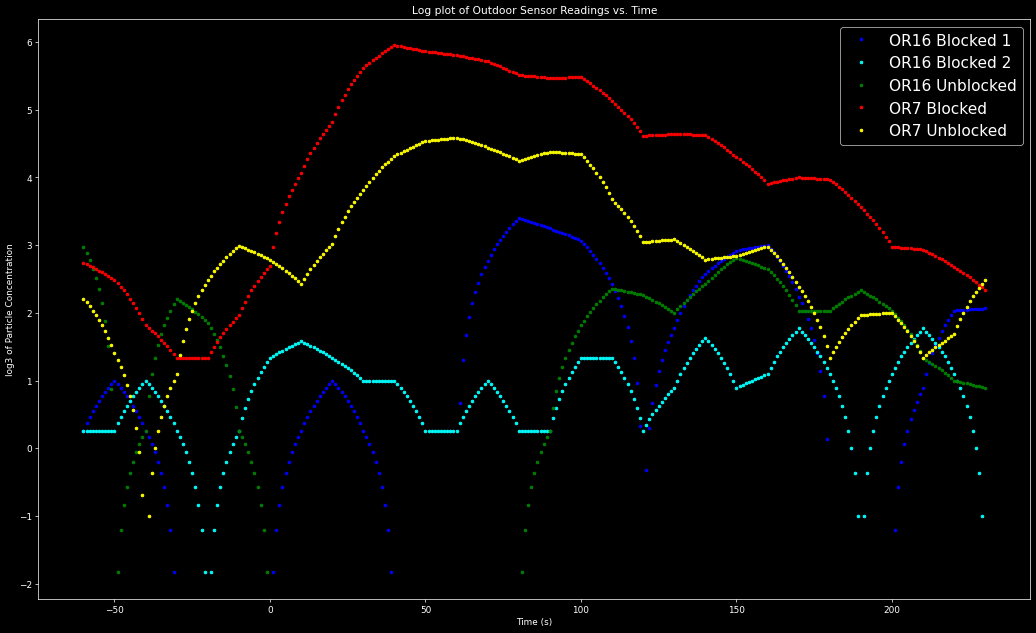

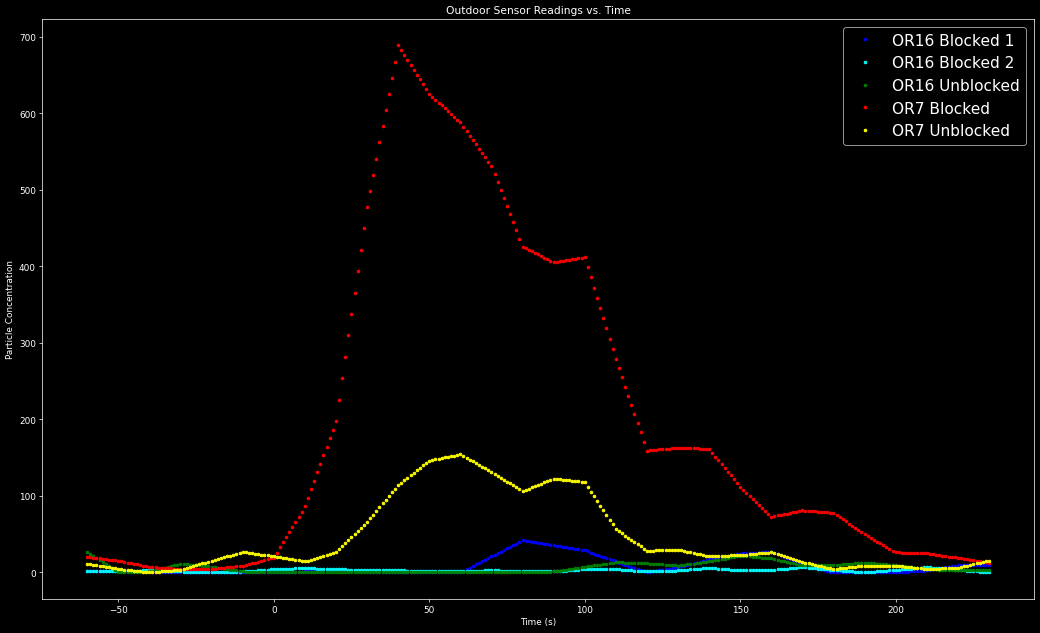

In [12]:
color = ['blue','cyan','green','red','yellow']
for idx,x in enumerate(stAvgDf):
    fig = plt.figure(0, figsize=(20,12), dpi=64)
    plt.title('Log plot of Outdoor Sensor Readings vs. Time')
    fig2 = plt.figure(1, figsize=(20,12), dpi=64)
    ax = fig.gca()
    ax2 = fig2.gca()
    yData = stAvgDf[x]['S-BU1']
    xData = indexList[x]

    ax.plot([i for i in range(-60,len(yData)-60)],np.log(yData)/np.log(3),'.',color = color[idx],label = x)

    ax2.plot([i for i in range(-60,len(yData)-60)],yData,'.',color = color[idx],label = x)


ax.legend(fontsize = 'xx-large')
ax.set_xlabel('Time (s)')
ax.set_ylabel('log3 of Particle Concentration')
ax2.legend(fontsize = 'xx-large')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Particle Concentration')
plt.title('Outdoor Sensor Readings vs. Time')

In [13]:
stAvgDf[x]

,S-01,S-03,S-04,S-05,S-06,S-07,S-08,S-09,S-11,S-12,S-13,S-14,S-15,S-BU1,S-BU2,Average,Variance
0,16.0,10.0,4.333333,6.0,75.000000,4.333333,0.0,10.0,3.0,3.0,9.0,19.0,10.0,11.333333,0.0,12.066667,398.422222
1,15.3,9.6,5.100000,6.6,74.133333,3.900000,0.0,9.0,3.3,3.0,9.3,19.3,10.0,10.666667,0.0,11.946667,399.051389
2,14.6,9.2,5.866667,7.2,73.266667,3.466667,0.0,8.0,3.6,3.0,9.6,19.6,10.0,10.000000,0.0,11.826667,399.680556
3,13.9,8.8,6.633333,7.8,72.400000,3.033333,0.0,7.0,3.9,3.0,9.9,19.9,10.0,9.333333,0.0,11.706667,400.309722
4,13.2,8.4,7.400000,8.4,71.533333,2.600000,0.0,6.0,4.2,3.0,10.2,20.2,10.0,8.666667,0.0,11.586667,400.938889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,50.6,27.4,14.400000,28.8,101.933333,43.200000,0.0,7.8,13.8,7.8,36.6,16.0,48.0,11.733333,0.0,27.204444,1252.152778
287,49.2,28.3,13.800000,30.6,101.533333,45.400000,0.0,8.1,12.6,8.1,38.7,16.0,41.0,12.633333,0.0,27.064444,1134.959722
288,47.8,29.2,13.200000,32.4,101.133333,47.600000,0.0,8.4,11.4,8.4,40.8,16.0,34.0,13.533333,0.0,26.924444,1017.766667
289,46.4,30.1,12.600000,34.2,100.733333,49.800000,0.0,8.7,10.2,8.7,42.9,16.0,27.0,14.433333,0.0,26.784444,900.573611
